# CLT vs PJ

In [231]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

## Cálculos CLT

### Cálculos Mensais

In [232]:
salario_mensal_bruto=[3_697.48,3_697.48,3_697.48,3_697.48,3_697.48,3_697.48,3_697.48,3_697.48,3_697.48,3_697.48,3_697.48 ]

In [233]:
def mostrar_descontos_mensais(funcao):
    """
    Formata saída para mostrar descontos mensais em formato de tabela
    """
    results =  [(f'{salario:,.2f}', f'{funcao(salario):,.2f}', f'{funcao(salario) / salario:.2%}') for salario in salario_mensal_bruto]
    df = pd.DataFrame(results, columns=["Salário","Imposto Descontado","Porcentagem"])
    return df

In [234]:
def imposto_de_renda_mensal(salario_mensal: float) -> float:
    """
    Calcula o imposto de renda PF de acordo com a faixa do ano de 2024.
    Link: https://www.gov.br/receitafederal/pt-br/assuntos/meu-imposto-de-renda/tabelas/2024
    Base de cálculo e alíquotas para 2024:
    Até R$ 2.259,20    -    Isento
    De R$ 2.259,21 até R$ 2.826,65    -    7,5%   (Dedução de R$ 169,44)
    De R$ 2.826,66 até R$ 3.751,05    -    15,0%  (Dedução de R$ 381,44)
    De R$ 3.751,06 até R$ 4.664,68    -    22,5%  (Dedução de R$ 662,77)
    Acima de R$ 4.664,68              -    27,5%  (Dedução de R$ 896,00)
    """
    # Definição das faixas e suas respectivas alíquotas e deduções
    faixas = [
        (4_664.68, 0.275, 896.00),
        (3_751.05, 0.225, 662.77),
        (2_826.65, 0.15, 381.44),
        (2_259.20, 0.075, 169.44),
        (0, 0, 0)
    ]
    
    imposto = 0
    for faixa, aliquota, deducao in faixas:
        if salario_mensal > faixa:
            imposto += (salario_mensal - faixa) * aliquota - deducao
            salario_mensal = faixa
    
    return max(imposto, 0)


Para o cálculo do imposto de renda, foi usada a [tabela desse site](https://www.gov.br/receitafederal/pt-br/assuntos/meu-imposto-de-renda/tabelas/2024), que está reproduzida abaixo:

| Base de Cálculo | Alíquota |
| --------------- | -------- |
|`Até R$ 2.112,00` | Insento |
|`De R$ 2.112,01 até R$ 2.826,65` | 7,5% |
|`De R$ 2.826,66 até R$ 3.751,05` | 15% | 
|`De R$ 3.751,06 até R$ 4.664,68` | 22,5% | 
|`Acima de R$4.664,68` | 27,5% |

Em seguida exibimos o salário, quanto foi descontado e o percentual real retido pelo imposto considerando o desconto simplificado.

In [235]:
mostrar_descontos_mensais(imposto_de_renda_mensal)


,Salário,Imposto Descontado,Porcentagem
0,"3,697.48",0.00,0.00%
1,"3,697.48",0.00,0.00%
2,"3,697.48",0.00,0.00%
3,"3,697.48",0.00,0.00%
4,"3,697.48",0.00,0.00%
5,"3,697.48",0.00,0.00%
6,"3,697.48",0.00,0.00%
7,"3,697.48",0.00,0.00%
8,"3,697.48",0.00,0.00%
9,"3,697.48",0.00,0.00%


In [236]:
def fgts_mensal(salario_mensal: float)-> float:
    """
    Calcula fgts a ser pago de imposto pelo empregador em 1 ano. 
    Aliquota de 8% + 40% disso em caso de demissão com justa causa -> 11,2%
    
    
    :param salario_mensal: salário mensal bruto do empregado
    :return: float
    """
    return salario_mensal * 0.112


def fgts_anual(salario_mensal: float) -> float:
    """
    Calcula o total de FGTS a ser pago pelo empregador em um ano.

    :param salario_mensal: salário mensal bruto do empregado
    :return: valor total do FGTS anual
    """
    return fgts_mensal(salario_mensal) * 12


In [237]:
mostrar_descontos_mensais(fgts_mensal)
# mostrar_descontos_mensais(fgts_anual)



,Salário,Imposto Descontado,Porcentagem
0,"3,697.48",414.12,11.20%
1,"3,697.48",414.12,11.20%
2,"3,697.48",414.12,11.20%
3,"3,697.48",414.12,11.20%
4,"3,697.48",414.12,11.20%
5,"3,697.48",414.12,11.20%
6,"3,697.48",414.12,11.20%
7,"3,697.48",414.12,11.20%
8,"3,697.48",414.12,11.20%
9,"3,697.48",414.12,11.20%


In [238]:
def inss_empregado(salario_mensal):
    """
    Link: https://www.contabilizei.com.br/contabilidade-online/desconto-inss/
    Calcula inss para 2024
    :param salario_mensal: 
    :return: 
    """
    # if salario_mensal < 1_751.81:
    #     return salario_mensal * 0.08
    # elif salario_mensal < 2_919.72:
    #     return salario_mensal * 0.09
    
    # teto = 5_839.45
    # return min(salario_mensal, teto) * 0.11
    if salario_mensal <= 1_412.00:
            return salario_mensal * 0.075
    elif salario_mensal <= 2_666.68:
        return salario_mensal * 0.09 - 21.18
    elif salario_mensal <= 4_000.03:
        return salario_mensal * 0.12 - 101.18
    elif salario_mensal <= 7_786.02:
        return salario_mensal * 0.14 - 181.18
    else:
        teto = 7_786.02
        return min(salario_mensal, teto)* 0.14 - 181.18

# Exemplo de uso
# salario_mensal_bruto = 5_000.00  # Exemplo de salário mensal
# inss_valor = inss_empregado(salario_mensal)

# print(f"INSS: R$ {inss_valor:.2f}")

In [239]:
mostrar_descontos_mensais(inss_empregado)

,Salário,Imposto Descontado,Porcentagem
0,"3,697.48",342.52,9.26%
1,"3,697.48",342.52,9.26%
2,"3,697.48",342.52,9.26%
3,"3,697.48",342.52,9.26%
4,"3,697.48",342.52,9.26%
5,"3,697.48",342.52,9.26%
6,"3,697.48",342.52,9.26%
7,"3,697.48",342.52,9.26%
8,"3,697.48",342.52,9.26%
9,"3,697.48",342.52,9.26%


### Cálculos Anuais

In [240]:
def imposto_de_renda_anual(salario):
    """
    Calcula imposto de renda anual considerando Décimo terceiro e terço de ferias
    :param salario: 
    :return: 
    """
    ir = imposto_de_renda_mensal(salario) * 11
    salario_de_ferias = salario + salario / 3
    ir += imposto_de_renda_mensal(salario_de_ferias - inss_empregado(salario_de_ferias)) / 0.80
    ir += imposto_de_renda_mensal(salario - inss_empregado(salario)) / 0.80  # Tributação exlusiva de décimo terceiro
    return ir


In [241]:
def mostrar_descontos_anuais(funcao):
    salarios = salario_mensal_bruto
    salarios_anuais = [s * 13 + s / 3 for s in salario_mensal_bruto]
    results = [
        (f'{salario:,.2f}', f'{salario_anual:,.2f}', f'{funcao(salario):,.2f}', f'{funcao(salario) / salario_anual:.2%}') for
        salario,  salario_anual in zip(salarios, salarios_anuais)]
    df = pd.DataFrame(results, columns=["Salário Mensal", "Salário Anual", "Imposto Descontado", "Porcentagem"])
    return df

In [242]:
mostrar_descontos_anuais(imposto_de_renda_anual)


,Salário Mensal,Salário Anual,Imposto Descontado,Porcentagem
0,"3,697.48","49,299.73",0.00,0.00%
1,"3,697.48","49,299.73",0.00,0.00%
2,"3,697.48","49,299.73",0.00,0.00%
3,"3,697.48","49,299.73",0.00,0.00%
4,"3,697.48","49,299.73",0.00,0.00%
5,"3,697.48","49,299.73",0.00,0.00%
6,"3,697.48","49,299.73",0.00,0.00%
7,"3,697.48","49,299.73",0.00,0.00%
8,"3,697.48","49,299.73",0.00,0.00%
9,"3,697.48","49,299.73",0.00,0.00%


In [243]:
def inss_anual(salario):
    """
    Calcula valor total descontado do empregado anualmente
    :param salario: 
    :return: 
    """
    ONZE_MESES_MAIS_DECIMO_TERCEIRO = 12
    inss = inss_empregado(salario) * ONZE_MESES_MAIS_DECIMO_TERCEIRO
    salario_ferias = salario + salario / 3
    return inss + inss_empregado(salario_ferias)


In [244]:
mostrar_descontos_anuais(inss_anual)


,Salário Mensal,Salário Anual,Imposto Descontado,Porcentagem
0,"3,697.48","49,299.73","4,619.23",9.37%
1,"3,697.48","49,299.73","4,619.23",9.37%
2,"3,697.48","49,299.73","4,619.23",9.37%
3,"3,697.48","49,299.73","4,619.23",9.37%
4,"3,697.48","49,299.73","4,619.23",9.37%
5,"3,697.48","49,299.73","4,619.23",9.37%
6,"3,697.48","49,299.73","4,619.23",9.37%
7,"3,697.48","49,299.73","4,619.23",9.37%
8,"3,697.48","49,299.73","4,619.23",9.37%
9,"3,697.48","49,299.73","4,619.23",9.37%


In [245]:
def impostos_anuais(salario):
    return imposto_de_renda_anual(salario)+inss_empregado(salario)

In [246]:
def resumo_empregado(salario):
    """
    Retorna tupla com (Salario Mensal, Salario Mensal liquido,Salario Anual Liquido, Salario Liquido +fgts,Salario Bruto Anual , Impostos, FGTS, 
    :param funcao: 
    :return: 
    """

    salario_anual_bruto = salario * 13 + salario / 3
    impostos = impostos_anuais(salario)
    fgts_anual = fgts_mensal(salario)
    fgts_anual = fgts_anual * 13 + fgts_anual / 3
    salario_mensal_liquido = salario - imposto_de_renda_mensal(salario) - fgts_mensal(salario) - inss_empregado(salario)
    salario_anual_menos_impostos = salario_anual_bruto - impostos
    return salario, salario_mensal_liquido, salario_anual_menos_impostos, salario_anual_menos_impostos + fgts_anual, salario_anual_bruto, impostos, fgts_anual,



In [247]:
result = [map(lambda v: f'{v:<15,.2f}', resumo_empregado(salario)) for salario in salario_mensal_bruto]
df = pd.DataFrame(result, columns=["Salário Mensal", "Salário Mensal Líquido","Salário Anual Líquido","Salário Liquido +FGTS", "Salário Bruto Anual", "Imposto Descontado", "FGTS"])
display(df)


,Salário Mensal,Salário Mensal Líquido,Salário Anual Líquido,Salário Liquido +FGTS,Salário Bruto Anual,Imposto Descontado,FGTS
0,"3,697.48","2,940.84","48,957.22","54,478.79","49,299.73",342.52,"5,521.57"
1,"3,697.48","2,940.84","48,957.22","54,478.79","49,299.73",342.52,"5,521.57"
2,"3,697.48","2,940.84","48,957.22","54,478.79","49,299.73",342.52,"5,521.57"
3,"3,697.48","2,940.84","48,957.22","54,478.79","49,299.73",342.52,"5,521.57"
4,"3,697.48","2,940.84","48,957.22","54,478.79","49,299.73",342.52,"5,521.57"
5,"3,697.48","2,940.84","48,957.22","54,478.79","49,299.73",342.52,"5,521.57"
6,"3,697.48","2,940.84","48,957.22","54,478.79","49,299.73",342.52,"5,521.57"
7,"3,697.48","2,940.84","48,957.22","54,478.79","49,299.73",342.52,"5,521.57"
8,"3,697.48","2,940.84","48,957.22","54,478.79","49,299.73",342.52,"5,521.57"
9,"3,697.48","2,940.84","48,957.22","54,478.79","49,299.73",342.52,"5,521.57"


In [248]:
faturamento_bruto = [(s+fgts_mensal(s)) * (13 + 1 / 3) for s in salario_mensal_bruto]



In [249]:
display(pd.DataFrame([f'{v:,.2f}' for v in faturamento_bruto], columns=["Faturamento Bruto"]))

,Faturamento Bruto
0,"54,821.30"
1,"54,821.30"
2,"54,821.30"
3,"54,821.30"
4,"54,821.30"
5,"54,821.30"
6,"54,821.30"
7,"54,821.30"
8,"54,821.30"
9,"54,821.30"


# PJ SIMPLES ANEXO III

In [250]:
def custos_simples_anexo_iii(faturamento_anual, contador=89, prolabore=1_100) -> float:
    """
    Calcula custos de impostos para empresa simples de anexo III
    DAS, Prólabore e Contador
    
    Aliquotas 2019: https://www.contabilizei.com.br/contabilidade-online/anexo-3-simples-nacional/
    :param faturamento_anual: 
    :param contador: 
    :param prolabore: 
    :return: 
    """
    saldo = faturamento_anual
    aliquotas_faixas = {0.33: 3_600_000, 0.21: 1_800_000, 0.16: 720_000, 0.135: 360_000, 0.112: 180_000, 0.06: 0}
    imposto = 0
    for aliquota, faixa in aliquotas_faixas.items():
        delta = max(saldo - faixa, 0)
        imposto += delta * aliquota
        saldo = min(saldo, faixa)
    inss = prolabore * 0.11
    return imposto + 12 * (contador + inss)


Para o cálculo de impostos PJ foi utilizada a tabela [desse site](https://www.contabilizei.com.br/contabilidade-online/anexo-3-simples-nacional/) reproduzida abaixo

| Faixa   | Alíquota|  Valor a Deduzir  | Receita Bruta em 12 Meses         |
| ------- | ------- | ----------------- | --------------------------------- |
|1a Faixa |	6,00%   |       -            |   Até 180.000,00                  | 
|2a Faixa |	11,20%  |   9.360,00	    |   De 180.000,01 a 360.000,00      |
|3a Faixa |	13,50%  |   17.640,00	    |   De 360.000,01 a 720.000,00      |
|4a Faixa |	16,00%  |   35.640,00	    |   De 720.000,01 a 1.800.000,00    |
|5a Faixa |	21,00%  |   125.640,00	    |   De 1.800.000,01 a 3.600.000,00  | 
|6a Faixa |	33,00%  |   648.000,00	    |   De 3.600.000,01 a 4.800.000,00  |

In [251]:
def resumo_pj(faturamento):
    custo_anual = custos_simples_anexo_iii(faturamento)
    return faturamento / 12, (faturamento - custo_anual) / 12, faturamento - custo_anual, faturamento 



In [252]:
results = [map(lambda v: f'{v:<15,.2f}', resumo_pj(faturamento)) for faturamento in faturamento_bruto]
display(pd.DataFrame(results, columns=["Faturamento Mensal", "Lucro Mensal", "Lucro Anual", "Faturamento Anual"]))

,Faturamento Mensal,Lucro Mensal,Lucro Anual,Faturamento Anual
0,"4,568.44","4,084.34","49,012.03","54,821.30"
1,"4,568.44","4,084.34","49,012.03","54,821.30"
2,"4,568.44","4,084.34","49,012.03","54,821.30"
3,"4,568.44","4,084.34","49,012.03","54,821.30"
4,"4,568.44","4,084.34","49,012.03","54,821.30"
5,"4,568.44","4,084.34","49,012.03","54,821.30"
6,"4,568.44","4,084.34","49,012.03","54,821.30"
7,"4,568.44","4,084.34","49,012.03","54,821.30"
8,"4,568.44","4,084.34","49,012.03","54,821.30"
9,"4,568.44","4,084.34","49,012.03","54,821.30"


# Resultado

In [253]:
data = []
for salario, faturamento in zip(salario_mensal_bruto, faturamento_bruto):
    result = []
    result.append(f'{salario:,.2f}')
    clt = resumo_empregado(salario)[2]
    result.append(f'{clt :<15,.2f}')
    pj = resumo_pj(faturamento)[2]
    result.append(f'{pj :<15,.2f}')
    result.append(f'{pj - clt :<15,.2f}')
    data.append(result)
df = pd.DataFrame(data, columns=["Salário Mensal", "CLT", "PJ", "DIFF"])
display(df)


,Salário Mensal,CLT,PJ,DIFF
0,"3,697.48","48,957.22","49,012.03",54.81
1,"3,697.48","48,957.22","49,012.03",54.81
2,"3,697.48","48,957.22","49,012.03",54.81
3,"3,697.48","48,957.22","49,012.03",54.81
4,"3,697.48","48,957.22","49,012.03",54.81
5,"3,697.48","48,957.22","49,012.03",54.81
6,"3,697.48","48,957.22","49,012.03",54.81
7,"3,697.48","48,957.22","49,012.03",54.81
8,"3,697.48","48,957.22","49,012.03",54.81
9,"3,697.48","48,957.22","49,012.03",54.81


In [254]:
data = []
index = []
for salario, faturamento in zip(salario_mensal_bruto, faturamento_bruto):
    result = []
    index.append(f'R$ {salario:,.2f}')
    clt = resumo_empregado(salario)[2]
    result.append(clt)
    pj = resumo_pj(faturamento)[2]
    result.append(pj)
    result.append(pj - clt)
    data.append(result)
df = pd.DataFrame(data, columns=[ "CLT", "PJ", "DIFF"], index=index)

/tmp/ipykernel_920081/2174673538.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'R${x:,.2f}' for x in vals]);


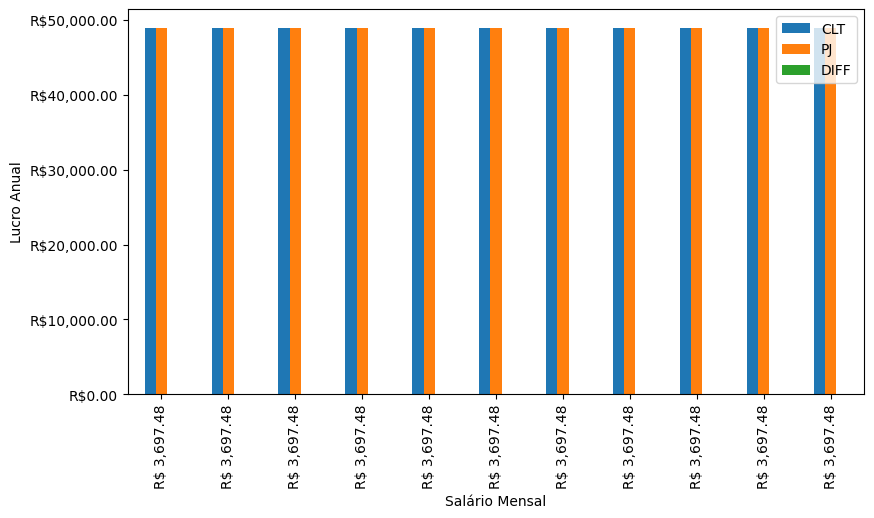

In [255]:
ax = df.plot.bar(figsize=(9.5,5));
vals = ax.get_yticks();
ax.set_yticklabels([f'R${x:,.2f}' for x in vals]);
ax.set_ylabel("Lucro Anual");
ax.set_xlabel("Salário Mensal");




In [256]:

def custos_simples_anexo_v(faturamento_anual, contador=89) -> float:
    """
    Calcula custos de impostos para empresa simples de anexo V
    manipulando pro labore para 28% DAS, Prólabore e Contador
    
    Aliquotas 2019: 
    :param faturamento_anual: 
    :param contador: 
    :param prolabore: 
    :return: imposto
    """
    saldo = faturamento_anual
    aliquotas_faixas = {0.33: 3_600_000, 0.21: 1_800_000, 0.16: 720_000, 0.135: 360_000, 0.112: 180_000, 0.06: 0}
    imposto = 0
    for aliquota, faixa in aliquotas_faixas.items():
        delta = max(saldo - faixa, 0)
        imposto += delta * aliquota
        saldo = min(saldo, faixa)
    prolabore= 0.28 * faturamento_anual/12
    prolabore = max(prolabore, 1000) # prolabore nao pode ser menor que salario minimo
    inss = prolabore * 0.11
    ir = imposto_de_renda_mensal(prolabore)
    return imposto + 12 * (contador + inss + ir)



In [257]:
def resumo_pj_v(faturamento):
    custo_anual = custos_simples_anexo_v(faturamento)
    return faturamento / 12, (faturamento - custo_anual) / 12, faturamento - custo_anual, faturamento 


In [258]:
results = [map(lambda v: f'{v:<15,.2f}', resumo_pj_v(faturamento)) for faturamento in faturamento_bruto]
display(pd.DataFrame(results, columns=["Faturamento Mensal", "Lucro Mensal", "Lucro Anual", "Faturamento Anual"]))


,Faturamento Mensal,Lucro Mensal,Lucro Anual,Faturamento Anual
0,"4,568.44","4,064.63","48,775.53","54,821.30"
1,"4,568.44","4,064.63","48,775.53","54,821.30"
2,"4,568.44","4,064.63","48,775.53","54,821.30"
3,"4,568.44","4,064.63","48,775.53","54,821.30"
4,"4,568.44","4,064.63","48,775.53","54,821.30"
5,"4,568.44","4,064.63","48,775.53","54,821.30"
6,"4,568.44","4,064.63","48,775.53","54,821.30"
7,"4,568.44","4,064.63","48,775.53","54,821.30"
8,"4,568.44","4,064.63","48,775.53","54,821.30"
9,"4,568.44","4,064.63","48,775.53","54,821.30"


In [259]:
data = []
for salario, faturamento in zip(salario_mensal_bruto, faturamento_bruto):
    result = []
    result.append(f'{salario:,.2f}')
    clt = resumo_empregado(salario)[2]
    result.append(f'{clt :<15,.2f}')
    pj = resumo_pj(faturamento)[2]
    result.append(f'{pj :<15,.2f}')
    result.append(f'{pj - clt :<15,.2f}')
    pj_v = resumo_pj_v(faturamento)[2]
    result.append(f'{pj_v :<15,.2f}')
    result.append(f'{pj_v - clt :<15,.2f}')
    data.append(result)
df = pd.DataFrame(data, columns=["Salário Mensal", "CLT", "PJ - III", "DIFF - III", "PJ - V", "DIFF - V"])
display(df)

,Salário Mensal,CLT,PJ - III,DIFF - III,PJ - V,DIFF - V
0,"3,697.48","48,957.22","49,012.03",54.81,"48,775.53",-181.69
1,"3,697.48","48,957.22","49,012.03",54.81,"48,775.53",-181.69
2,"3,697.48","48,957.22","49,012.03",54.81,"48,775.53",-181.69
3,"3,697.48","48,957.22","49,012.03",54.81,"48,775.53",-181.69
4,"3,697.48","48,957.22","49,012.03",54.81,"48,775.53",-181.69
5,"3,697.48","48,957.22","49,012.03",54.81,"48,775.53",-181.69
6,"3,697.48","48,957.22","49,012.03",54.81,"48,775.53",-181.69
7,"3,697.48","48,957.22","49,012.03",54.81,"48,775.53",-181.69
8,"3,697.48","48,957.22","49,012.03",54.81,"48,775.53",-181.69
9,"3,697.48","48,957.22","49,012.03",54.81,"48,775.53",-181.69
